In [ ]:
#Install Packages
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

In [ ]:
plt.figure(figsize=(1,1))
df=pd.read_csv("/content/AAPL.csv")

<Figure size 72x72 with 0 Axes>

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.        ]
 [0.00554218]
 [0.00546521]
 ...
 [0.93249299]
 [0.9321081 ]
 [0.94842685]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.        ],
       [0.00554218],
       [0.00546521],
       [0.00567689],
       [0.00889061],
       [0.00902531],
       [0.00792842],
       [0.00900606],
       [0.0085827 ],
       [0.00837102],
       [0.0065621 ],
       [0.00458   ],
       [0.005369  ],
       [0.00384874],
       [0.00546521],
       [0.00754354],
       [0.00964111],
       [0.0131627 ],
       [0.01191187],
       [0.01554893],
       [0.01554893],
       [0.01676128],
       [0.01704994],
       [0.01833927],
       [0.01893581],
       [0.0191475 ],
       [0.01766574],
       [0.01810833],
       [0.01953238],
       [0.0185702 ],
       [0.01851247],
       [0.01676128],
       [0.01739632],
       [0.01714615],
       [0.01828154],
       [0.02078323],
       [0.02286153],
       [0.02309247],
       [0.02432406],
       [0.02336188],
       [0.02295776],
       [0.02480516],
       [0.02478591],
       [0.0243818 ],
       [0.02480516],
       [0.02495911],
       [0.02474743],
       [0.028

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 199ms/step - loss: 0.0078 - val_loss: 0.1494
Epoch 2/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0024 - val_loss: 0.0224
Epoch 3/100
12/12 [==============================] - 1s 83ms/step - loss: 8.3630e-04 - val_loss: 0.0036
Epoch 4/100
12/12 [==============================] - 1s 83ms/step - loss: 3.8761e-04 - val_loss: 0.0307
Epoch 5/100
12/12 [==============================] - 1s 84ms/step - loss: 3.4468e-04 - val_loss: 0.0089
Epoch 6/100
12/12 [==============================] - 1s 84ms/step - loss: 3.0992e-04 - val_loss: 0.0071
Epoch 7/100
12/12 [==============================] - 1s 84ms/step - loss: 3.1657e-04 - val_loss: 0.0159
Epoch 8/100
12/12 [==============================] - 1s 82ms/step - loss: 3.2050e-04 - val_loss: 0.0110
Epoch 9/100
12/12 [==============================] - 1s 84ms/step - loss: 2.8393e-04 - val_loss: 0.0080
Epoch 10/100
12/12 [==============================] - 1s 84ms/step - lo

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

49.0545615463138

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

130.97998056622063

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

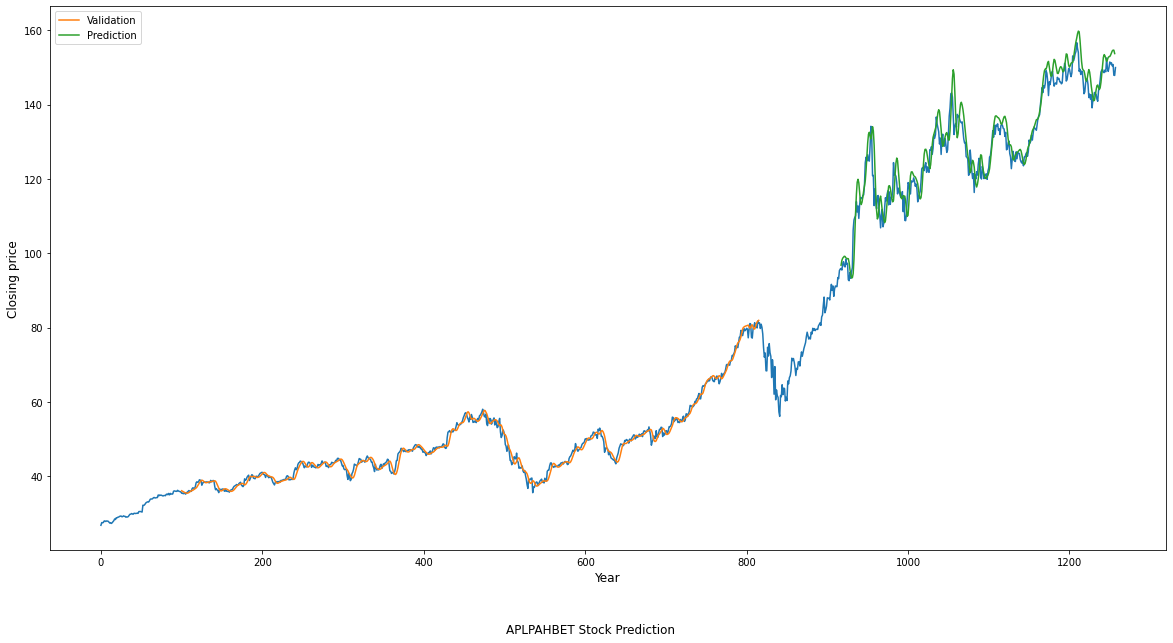

In [ ]:

### Plotting  the LSTM model
# plot baseline and predictions
plt.figure(figsize = (20, 10))
plt.plot(scaler.inverse_transform(df1))
txt="APLPAHBET Stock Prediction"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.plot(trainPredictPlot,label='Validation')
plt.plot(testPredictPlot,label='Prediction')
plt.ylabel('Closing price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.show()

In [ ]:

len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)
predict={'name': lst_output}

[0.9607126]
101
1 day input [0.81849321 0.831348   0.84327913 0.84812859 0.85051479 0.87122105
 0.88707786 0.90670648 0.8964688  0.91086307 0.9061676  0.91494273
 0.94196087 0.93680357 0.92071584 0.89038772 0.91886841 0.91309529
 0.92387185 0.93741939 0.94072936 0.92364093 0.90986236 0.91494273
 0.91663619 0.91401907 0.92818242 0.92502642 0.92587315 0.91879147
 0.91840657 0.91463488 0.91663619 0.93995957 0.94157609 0.95712493
 0.94996632 0.92048494 0.92310205 0.93457135 0.94627157 0.9455787
 0.93587991 0.92956791 0.93772735 0.97251991 0.96259021 0.96782444
 0.97659957 0.98160301 1.         0.98783796 0.97983262 0.94057538
 0.94503994 0.93403247 0.94103721 0.93918977 0.91817567 0.89415953
 0.89793123 0.91655925 0.92410276 0.92479551 0.91286438 0.88623113
 0.89331281 0.88307513 0.8919272  0.86490905 0.88007312 0.88692388
 0.89685358 0.89385157 0.89315883 0.88315207 0.87853365 0.90047142
 0.90878471 0.92194747 0.93895886 0.94280761 0.94450106 0.93842009
 0.93803519 0.94326955 0.93965172 0

In [ ]:
Predict=[]
for i in range(0,30):
  Predict.append(lst_output[i][0])


print (Predict)

[0.9607126116752625, 0.9644430875778198, 0.9753850698471069, 0.9905889630317688, 1.0081515312194824, 1.0271718502044678, 1.0473006963729858, 1.068393349647522, 1.0903549194335938, 1.113110899925232, 1.1366254091262817, 1.1609182357788086, 1.186070203781128, 1.212212324142456, 1.2395073175430298, 1.268131136894226, 1.298250675201416, 1.3300083875656128, 1.3635096549987793, 1.3988127708435059, 1.4359266757965088, 1.474811315536499, 1.515381097793579, 1.557512640953064, 1.6010496616363525, 1.6458125114440918, 1.6916024684906006, 1.7382090091705322, 1.78541100025177, 1.8329826593399048]


In [ ]:
array=np.asarray(Predict)
a=array.reshape(-1,1)
scale=scaler.inverse_transform(a)
b=list(scale)
pred=[]
for i in range(0,30):
  pred.append(b[i][0])


print (pred)

[151.58607908568774, 152.07071454383967, 153.4922148372824, 155.46739064104258, 157.74898781585406, 160.2199650440316, 162.8349538121569, 165.5751531728704, 168.42823565162658, 171.38452201275848, 174.43935073636888, 177.59529262745093, 180.86284772085617, 184.25903598458146, 187.80499686932347, 191.5235888580334, 195.43649343860528, 199.56221730963443, 203.91445078204822, 208.50076688983248, 213.3223271412673, 218.37392797925804, 223.64444989787052, 229.11786408284019, 234.77386736943197, 240.58912118460557, 246.53780907099008, 252.59258138028477, 258.7247101410301, 264.9048633974607]


In [ ]:
df = pd.DataFrame(data={'a': pred,'b': pred,'c': pred,'d': pred,'Close': pred})
df.to_csv("/content/Predict.csv", sep=',',index=False)

In [ ]:
class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        self.state_size = state_size # normalized previous days
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen=1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = load_model(model_name) if is_eval else self._model()
    def _model(self):
        model = Sequential()
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(lr=0.001))
        return model
    def act(self, state):
        if not self.is_eval and random.random()<= self.epsilon:
            return random.randrange(self.action_size)
        options = self.model.predict(state)
        return np.argmax(options[0])
    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])
        for state, action, reward, next_state, done in mini_batch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [ ]:
def formatPrice(n):
    return("-$." if n<0 else "$.")+"{0:.2f}".format(abs(n))
def sigmoid(x):
    return 1/(1+math.exp(-x))
def getState(data, t, n):
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))
    return np.array([res])

In [ ]:

import sys
import matplotlib.pyplot as plt
window_size = input("window_size")
episode_count = input(" Episode_count")

window_size = int(window_size)
episode_count = int(episode_count)
agent = Agent(window_size)
data = pred
l = len(data) - 1
batch_size = 32
states_sell = []
states_buy = []

for e in range(episode_count + 1):
	print("Episode " + str(e) + "/" + str(episode_count))
	state = getState(data, 0, window_size + 1)

	total_profit = 0
	agent.inventory = []

	for t in range(l):
		action = agent.act(state)

		# sit
		next_state = getState(data, t + 1, window_size + 1)
		reward = 0

		if action == 1: # buy
			agent.inventory.append(data[t])
			print("Buy: " + formatPrice(data[t]))
			states_buy.append(t)

		elif action == 2 and len(agent.inventory) > 0: # sell
			bought_price = agent.inventory.pop(0)
			reward = max(data[t] - bought_price, 0)
			total_profit += data[t] - bought_price
			print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))
			states_sell.append(t)

		done = True if t == l - 1 else False
		agent.memory.append((state, action, reward, next_state, done))
		state = next_state

		if done:
			print("--------------------------------")
			print("Total Profit: " + formatPrice(total_profit))
			print("--------------------------------")

		if len(agent.memory) > batch_size:
			agent.expReplay(batch_size)

	if e % 1 == 0:
		agent.model.save("model/model_ep" + str(e))

	figure = "models/model_ep{}_profit:{}.png".format(str(e),round(total_profit,0))




window_size1
 Episode_count1


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Episode 0/1
Buy: $.151.59
Sell: $.153.49 | Profit: $.1.91
Buy: $.168.43
Buy: $.171.38
Sell: $.177.60 | Profit: $.9.17
Buy: $.180.86
Sell: $.184.26 | Profit: $.12.87
Sell: $.187.80 | Profit: $.6.94
Buy: $.203.91
Buy: $.208.50
Sell: $.213.32 | Profit: $.9.41
Buy: $.218.37
Sell: $.240.59 | Profit: $.32.09
Buy: $.252.59
--------------------------------
Total Profit: $.72.39
--------------------------------
INFO:tensorflow:Assets written to: model/model_ep0/assets
Episode 1/1
Buy: $.151.59
Buy: $.152.07
Sell: $.153.49 | Profit: $.1.91
Buy: $.155.47
Buy: $.157.75
Buy: $.162.83
Sell: $.168.43 | Profit: $.16.36
Buy: $.177.60
Sell: $.184.26 | Profit: $.28.79
Sell: $.187.80 | Profit: $.30.06
Sell: $.191.52 | Profit: $.28.69
Buy: $.195.44
Sell: $.203.91 | Profit: $.26.32
Sell: $.213.32 | Profit: $.17.89
Buy: $.246.54
Sell: $.258.72 | Profit: $.12.19
--------------------------------
Total Profit: $.162.19
--------------------------------
INFO:tensorflow:Assets written to: model/model_ep1/assets


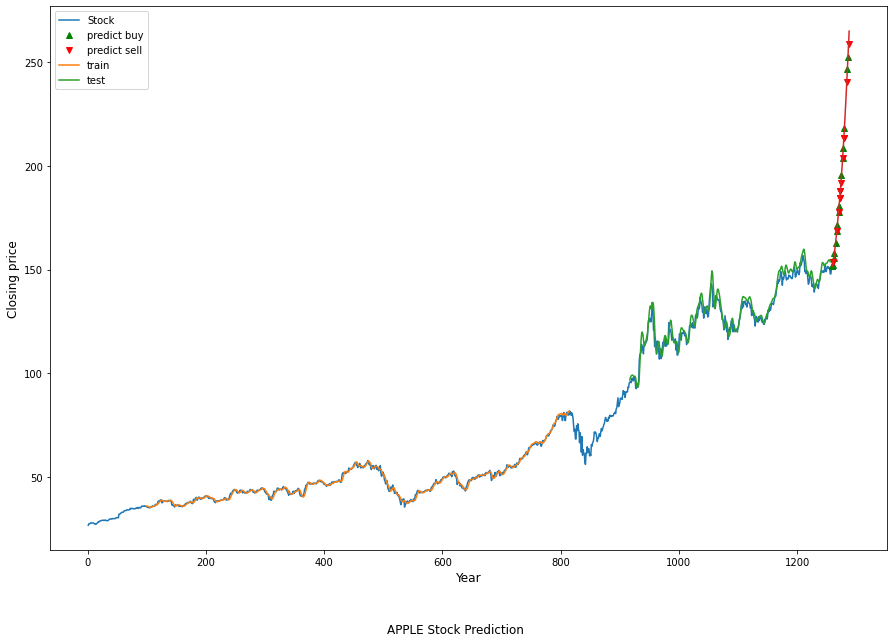

In [ ]:
#Plotting the hybrid
plt.figure(figsize = (15, 10))
day_new=np.arange(1,1259)
day_pred=np.arange(1259,1289)
txt="APPLE Stock Prediction"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.plot(day_new,scaler.inverse_transform(df1),label = 'Stock')
plt.plot(day_pred,data,'^',markevery=states_buy,c='g',label = 'predict buy')
plt.plot(day_pred,data,'v',markevery=states_sell,c='r',label = 'predict sell')
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.ylabel('Closing price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.plot(day_pred,data)

plt.legend()